In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [5]:
class step_2_decision_tree_classifier():
    def __init__(self, data):
        self.data = data
        self.X = None
        self.Y = None
        self.best_model = None

    def train_model(self, param_grid):
        """
        Trains a Decision Tree model using GridSearchCV.

        :param param_grid: Dictionary of hyperparameters to optimize.
        :return: Best trained model
        """

        self.X = self.data.drop(['CustomerID', 'Churn'], axis=1)  # Features
        self.Y = self.data["Churn"]  # Target variable

        # Split into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(self.X, self.Y, test_size=0.25, random_state=42, stratify=self.Y)

        # Initialize Decision Tree model
        dt = DecisionTreeClassifier(random_state=42)

        # Perform GridSearchCV
        grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Store the best model
        self.best_model = grid_search.best_estimator_

        # Return the trained model
        return self.best_model
    

    def plot_model(self):
        """
        Plots the decision tree of the given model.

        :param model: Trained DecisionTreeClassifier model to visualize.
        """
        plt.figure(figsize=(15, 8))
        plot_tree(
            self.best_model, 
            feature_names=self.X.columns.tolist(),  
            class_names=["Churn", "Not Churn"], 
            filled=True, 
            rounded=True
        )
        plt.show()


    def test_decision_tree(self, Dataframe_, model):
        """
        Tests the trained decision tree model on a new dataset.

        :param file_name: Path to the dataset file.
        :param model: Trained DecisionTreeClassifier model.
        :return: accuracy, precision, recall, f1 performance metrics
        """
        # Load the dataset
        Data = Dataframe_

        X_test = Data.drop(['CustomerID', 'Churn'], axis=1)  # Features
        y_test = Data["Churn"]  # Target variable

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Return the performance metrics
        return accuracy, precision, recall, f1

In [6]:
custom_param_grid = {
    "max_depth": [16],
    "min_samples_leaf": [10],
    "min_samples_split": [40],
    "criterion": ["gini", "entropy"]
}

train_df =  pd.read_csv('../Dataset/cleaned_customer_churn_dataset_training.csv')
test_df =  pd.read_csv('../Dataset/cleaned_customer_churn_dataset_testing.csv')

print(train_df)
print("*" *100)
print(test_df)


        CustomerID   Age  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0    39.0             14.0            5.0   
1              3.0  65.0    49.0              1.0           10.0   
2              4.0  55.0    14.0              4.0            6.0   
3              5.0  58.0    38.0             21.0            7.0   
4              6.0  23.0    32.0             20.0            5.0   
...            ...   ...     ...              ...            ...   
440828    449995.0  42.0    54.0             15.0            1.0   
440829    449996.0  25.0     8.0             13.0            1.0   
440830    449997.0  26.0    35.0             27.0            1.0   
440831    449998.0  28.0    55.0             14.0            2.0   
440832    449999.0  31.0    48.0             20.0            1.0   

        Payment Delay  Subscription Type  Contract Length  Total Spend  \
0                  10                  2                1       932.00   
1                  29              

In [7]:
decision_tree_classifier = step_2_decision_tree_classifier(train_df)
best_model = decision_tree_classifier.train_model(param_grid=custom_param_grid)
print(best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=10,
                       min_samples_split=40, random_state=42)


In [8]:
accuracy, precision, recall, f1 = decision_tree_classifier.test_decision_tree(test_df, best_model)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5186
Precision: 0.4960
Recall: 0.9983
F1 Score: 0.6627


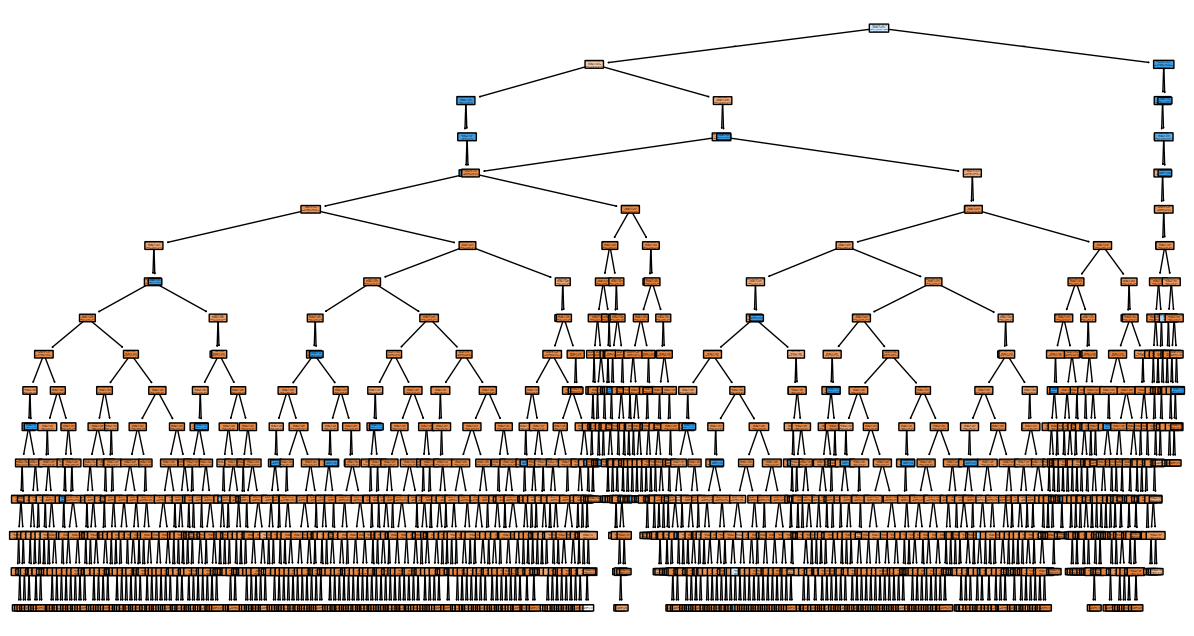

In [9]:
decision_tree_classifier.plot_model()